[[-105, -90, -10, 160], [-90, -75, -10, 160], [-90, -75, -10, 160], [-90, -75, -10, 160], [-90, -75, -10, 160], [-90, -75, -10, 160], [-75, -60, -10, 160], [-75, -60, -10, 160], [-75, -60, -10, 160], [-75, -60, -10, 160], [-75, -60, -10, 160], [-75, -60, -10, 160], [-75, -60, -10, 160], [-60, -45, -10, 160], [-60, -45, -10, 160], [-60, -45, -10, 160], [-60, -45, -10, 160], [-60, -45, -10, 160], [-60, -45, -10, 160], [-60, -45, -10, 160], [-60, -45, -10, 160], [-60, -45, -10, 160], [-60, -45, -10, 160], [-60, -45, -10, 160], [-45, -30, -10, 160], [-45, -30, -10, 160], [-45, -30, -10, 160], [-45, -30, -10, 160], [-45, -30, -10, 160], [-45, -30, -10, 160], [-45, -30, -10, 160], [-45, -30, -10, 160], [-45, -30, -10, 160], [-45, -30, -10, 160], [-45, -30, -10, 160], [-45, -30, -10, 160], [-45, -30, -10, 160], [-45, -30, -10, 160], [-45, -30, -10, 160], [-45, -30, -10, 160], [-45, -30, -10, 160], [-45, -30, -10, 160], [-45, -30, -10, 160], [-45, -30, -10, 160], [-45, -30, -10, 160], [-30, -1

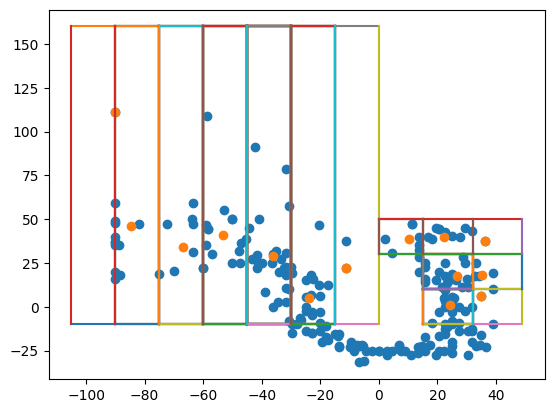

In [4]:
import pandas as pd
import csv
import numpy as np
import matplotlib.pylab as plt
import matplotlib.gridspec as pltgr
import matplotlib.patches as pathes
from scipy import interpolate
from scipy.signal import savgol_filter
import math as ma
data=pd.read_excel("Curve.xlsx")
df=pd.DataFrame(data)
# df.plot.scatter(x=df['x'],y=df['y'])
# print(df)
xs=list(df['x'].dropna())
ys=list(df['y'].dropna())

# mean_x_axis = [i for i in range(max(xs))]
# ys_interp = [np.interp(mean_x_axis, xs[i], ys[i]) for i in range(len(xs))]
# mean_y_axis = np.mean(ys_interp, axis=0)

# plt.plot(df['x1'], df['y1'], df['x2'], df['y2'], df['x3'], df['y3'], df['x4'], df['y4'], 
# df['x5'], df['y5'],df['x6'], df['y6'],df['x7'], df['y7'],df['x8'], df['y8'],df['x9'], df['y9'],df['x10'], df['y10'], df['x11'], df['y11'])

# plt.plot(df['x1'], df['y1'])
# plt.scatter(df['x'],df['y'])
# print(xs,ys)
plt.scatter(df['x'], df['y'])

xy=dict(zip(xs,ys))
# print(xy)
y_axis=-20
average_y=[]
average_x=[]
step=15

def get_mean_coordinates(dict, x_min, x_max, y_min, y_max, step_x,step_y,diff_x,diff_y):
    x=x_min
    xy_by_pixels={} 
    listx={}   
    listy={}
    aver_area=[]
    while x <= x_max:
        if x>10:
            step_xnew=step_x+diff_x
        else:
            step_xnew=step_x
        x=x+step_xnew
        y=y_min
        if x<=0:
            step_ynew=step_y+diff_y
        else:
            step_ynew=step_y
        while y<=y_max:
            y=y+step_ynew
            averaging={}
            for i in dict.keys():
                if x-step_xnew<=i<=x and y-step_ynew<=dict[i]<=y:
                    averaging[i]=dict[i]
                    area=[x-step_xnew,x,y-step_ynew,y]
                    aver_area.append(area)
                    listx[x]=x-step_xnew
                    listy[y]=y-step_ynew
            if len(averaging)>0:
                mean_x=(np.mean(list(averaging.keys())))
                mean_y=(np.mean(list(averaging.values())))
                xy_by_pixels[mean_x]=mean_y  
    return xy_by_pixels,listx,aver_area         
mean_data=get_mean_coordinates(xy,-120,40,-10,150,15,20,2,150)
mean_data_by_pixels=mean_data[0]
xgrid=list(mean_data[1].keys())+list(mean_data[1].values())
# ygrid=list(mean_data[2].keys())+list(mean_data[2].values())
# print(set(xgrid))
aver_area=mean_data[2]
print(aver_area)
# print(set(ygrid))
res=plt.scatter(list(mean_data_by_pixels.keys()),list(mean_data_by_pixels.values()))
for i in aver_area:
    plt.plot([i[0],i[1]],[i[2],i[2]])
    plt.plot([i[0],i[1]],[i[3],i[3]])
    plt.plot([i[1],i[1]],[i[2],i[3]])
    plt.plot([i[0],i[0]],[i[2],i[3]])
    
    # pathes.Rectangle((i[1],i[3]),abs(abs(i[0])-abs(i[1])),abs(abs(i[2])-abs(i[3])))
# plt.show()
    


{-22.7273: -15.0}
{-22.7273: -15.0, -19.4444: -20.0}
{-22.7273: -15.0, -19.4444: -20.0, -18.1818: -11.1111}
{-22.7273: -15.0, -19.4444: -20.0, -18.1818: -11.1111, -17.3077: -18.75}
{-22.7273: -15.0, -19.4444: -20.0, -18.1818: -11.1111, -17.3077: -18.75, -15.0: -15.625}
{-22.7273: -15.0, -19.4444: -20.0, -18.1818: -11.1111, -17.3077: -18.75, -15.0: -15.625, 22.7273: 25.0}
{-22.7273: -15.0, -19.4444: -20.0, -18.1818: -11.1111, -17.3077: -18.75, -15.0: -15.625, 22.7273: 25.0, 23.3333: 13.636400000000002}


c:\Users\pasha\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\core\fromnumeric.py:3464: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
c:\Users\pasha\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\core\_methods.py:192: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


(-60.0, 60.0)

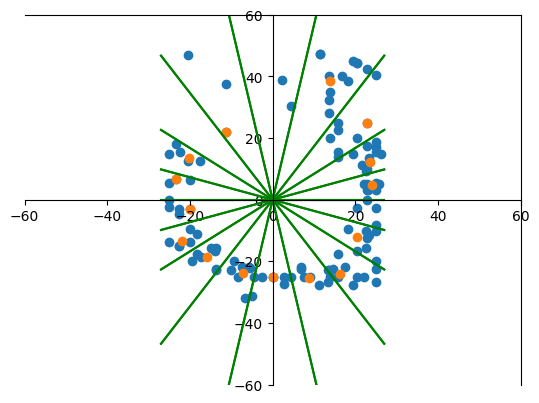

In [95]:

x_r=list(df['xround'].dropna())
y_r=list(df['yround'].dropna())

def ray(x, y, azimuth, elevation, step):
    new_x = x + ma.cos(elevation) * ma.cos(azimuth) * step
    new_y = y + ma.cos(elevation) * ma.sin(azimuth) * step
    return new_x, new_y

res=ray(0,0,20,30,150)
# print(res)
fig = plt.subplots()
plt.scatter(df['xround'], df['yround'])
plt.gca().spines['bottom'].set_position(('data',0))
plt.gca().spines['left'].set_position(('data',0))
step_angle=20
x = np.array([-27,27])
xy=dict(zip(x_r,y_r))
y_sectors=[]
crit_sector=[]
for i in range(0,360,step_angle):
    y = x*ma.tan(ma.radians(i))
    angle_K=ma.tan(ma.radians(i))
    y_sectors.append(angle_K)
    plt.plot(x,y, 'g-')
# for i in range(0,360,step_angle):
#     x=ma.sqrt(1/((ma.tan(ma.radians(i))**2)+1))
#     y=ma.sqrt(ma.tan(ma.radians(i))**2/((ma.tan(ma.radians(i))**2)+1))
#     angle_K=ma.tan(ma.radians(i))
#     y_sectors.append(angle_K)
#     plt.plot([0,x*200],[0,y*200], 'r-')
#     if 180>i>90:
#         plt.plot([0,x*-200],[0,y*200], 'r-')
#     if 270>i>=180:
#         plt.plot([0,x*-200],[0,y*-200], 'r-')
#     if 360>i>270:
#         plt.plot([0,x*200],[0,y*-200], 'r-')
#     else:
#         plt.plot([0,x*200],[0,y*200], 'r-')
def coordinates_averaging(array):
    x_average=np.mean(list(array.keys()))
    y_average=np.mean(list(array.values())) 
    average_coordinates[x_average]=y_average
    return average_coordinates
average_coordinates={}
steps_before_crit=(360-90)/step_angle
for i in range(0, len(y_sectors)):
    if i<=steps_before_crit<=i+1:
        crit_sector.append(y_sectors[i])
        crit_sector.append(y_sectors[i+1])
for i in range(0,len(y_sectors)):
    average_array0={}
    average_array1={}
    average_array2={}
    average_array3={}
    average_array4={}
    for j in xy:
        if j<0 and xy[j]<0 and y_sectors[i-1]<xy[j]/j<y_sectors[i]:
            average_array3[j]=xy[j]
        elif j>0 and xy[j]<0 and y_sectors[i-1]<xy[j]/j<y_sectors[i]:
            average_array4[j]=xy[j]
        elif j<0 and xy[j]>0 and y_sectors[i-1]<xy[j]/j<y_sectors[i]:
            average_array2[j]=xy[j]
        elif j>0 and xy[j]>0 and y_sectors[i-1]<xy[j]/j<y_sectors[i]:
            average_array1[j]=xy[j]  
        elif j==0:
            average_array0[j]=xy[j]
    # print(average_array1, y_sectors[i-1], y_sectors[i])
    # print(average_array1)
    arrr0=coordinates_averaging(average_array0)
    arrr1=coordinates_averaging(average_array1)
    arrr2=coordinates_averaging(average_array2)
    arrr3=coordinates_averaging(average_array3)
    arrr4=coordinates_averaging(average_array4)
    average_coordinates=arrr1.copy()
    # print(arrr1)
    average_coordinates.update(arrr2)
    average_coordinates.update(arrr3)
    average_coordinates.update(arrr4)
    average_coordinates.update(arrr0)
test={}
for i in xy:
    if i !=0 and ma.tan(ma.radians(40))<i/xy[i]<ma.tan(ma.radians(60)):
        test[i]=xy[i]
        print(test)
        # print(i,  ma.tan(ma.radians(40)), ma.tan(ma.radians(60)))
# print(average_array1)
plt.scatter(list(average_coordinates.keys()),list(average_coordinates.values()))
plt.xlim(-60,60)
plt.ylim(-60,60)
# print(average_coordinates)